

# Zero-Shot Object Detection with Grounding DINO

---


Grounding DINO can detect **arbitrary objects** with human inputs such as category names or referring expressions. The key solution of open-set object detection is introducing language to a closed-set detector DINO. for open-set concept generalization. 

![grounding dino figure](https://media.roboflow.com/notebooks/examples/grounding-dino-figure.png)

## Complementary Materials

---



We recommend that you follow along in this notebook while reading the blog post on Grounding DINO. We will talk about the advantages of Grounding DINO, analyze the model architecture, and provide real prompt examples.

![grounding dino](https://media.roboflow.com/notebooks/examples/grounding-dino.png)


## Steps in this Tutorial

In this tutorial, we are going to cover:

- Install Grounding DINO 🦕
- Download Grounding DINO Weights 🏋️
- Download Example Data
- Load Grounding DINO Model
- Grounding DINO Demo


In [1]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\CHATURYA\OneDrive\Desktop\Object detection Models\Grounding DINO


In [2]:
#!lsGroundingDINO

## Install Grounding DINO 🦕 

In [9]:
%cd {HOME}
#!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
#!pip install -q -e .
#!pip install -q roboflow

C:\Users\CHATURYA\OneDrive\Desktop\Object detection Models\Grounding DINO
C:\Users\CHATURYA\OneDrive\Desktop\Object detection Models\Grounding DINO\GroundingDINO


In [10]:
#!pwd

In [11]:
#!zip -r sample_data.zip sample_data

In [12]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

C:\Users\CHATURYA\OneDrive\Desktop\Object detection Models\Grounding DINO\GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Download Grounding DINO Weights 🏋️

In [13]:
%cd {HOME}
#!mkdir {HOME}/weights
%cd {HOME}/weights

#!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

C:\Users\CHATURYA\OneDrive\Desktop\Object detection Models\Grounding DINO
[WinError 2] The system cannot find the file specified: 'C:\\Users\\CHATURYA\\OneDrive\\Desktop\\Object detection Models\\Grounding DINO/weights'
C:\Users\CHATURYA\OneDrive\Desktop\Object detection Models\Grounding DINO


In [14]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

C:\Users\CHATURYA\OneDrive\Desktop\Object detection Models\Grounding DINO\weights\groundingdino_swint_ogc.pth ; exist: False


## Download Example Data

In [21]:
%cd {HOME}
#!mkdir {HOME}/data
%cd {HOME}/data

#!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
#!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
#!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
#!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

C:\Users\CHATURYA\OneDrive\Desktop\Object detection Models\Grounding DINO
[WinError 2] The system cannot find the file specified: 'C:\\Users\\CHATURYA\\OneDrive\\Desktop\\Object detection Models\\Grounding DINO/data'
C:\Users\CHATURYA\OneDrive\Desktop\Object detection Models\Grounding DINO


## Load Grounding DINO Model

In [22]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

C:\Users\CHATURYA\OneDrive\Desktop\Object detection Models\Grounding DINO\GroundingDINO


ModuleNotFoundError: No module named 'torch'

## Grounding DINO Demo

In [20]:
import os
import supervision as sv

IMAGE_NAME = "dog-3.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "alphabets"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

NameError: name 'load_image' is not defined

In [43]:
boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:866: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


In [ ]:
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.plot_image(annotated_frame, (16, 16))

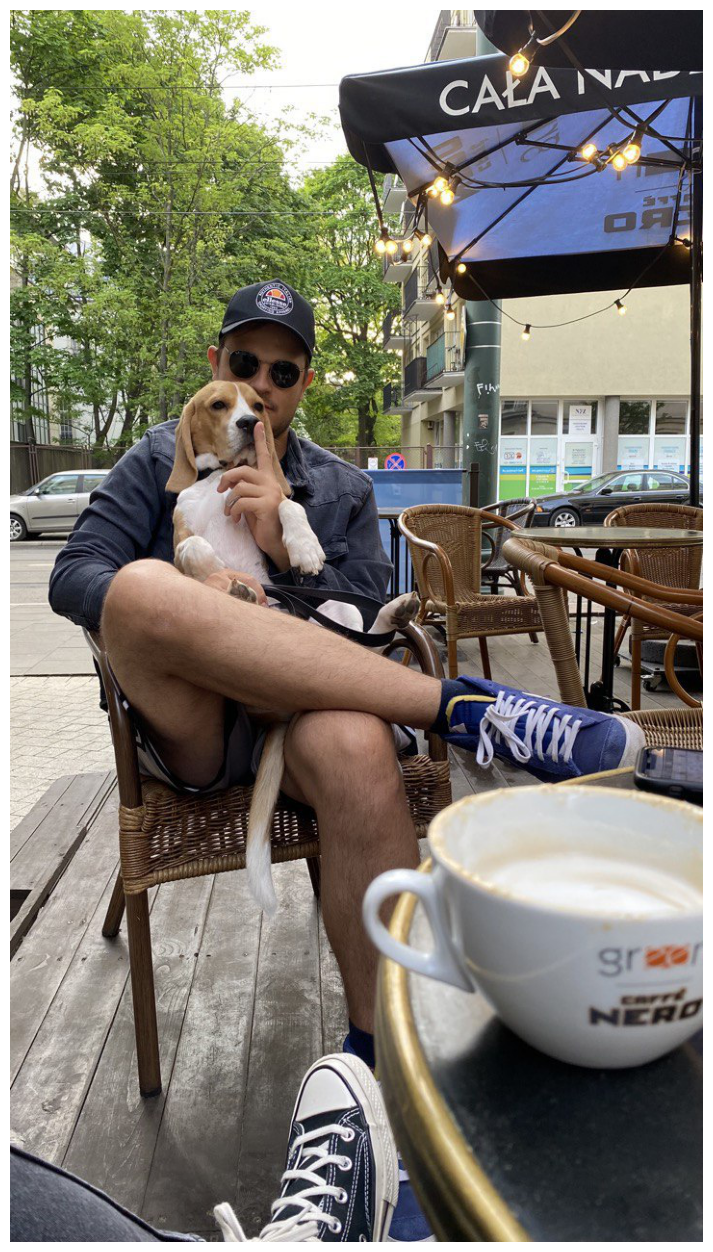

In [46]:
import os
import supervision as sv

IMAGE_NAME = "dog-3.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

# TEXT_PROMPT = "chair with man sitting on it"
TEXT_PROMPT = "Alphabets"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.15

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.plot_image(annotated_frame, (16, 16))

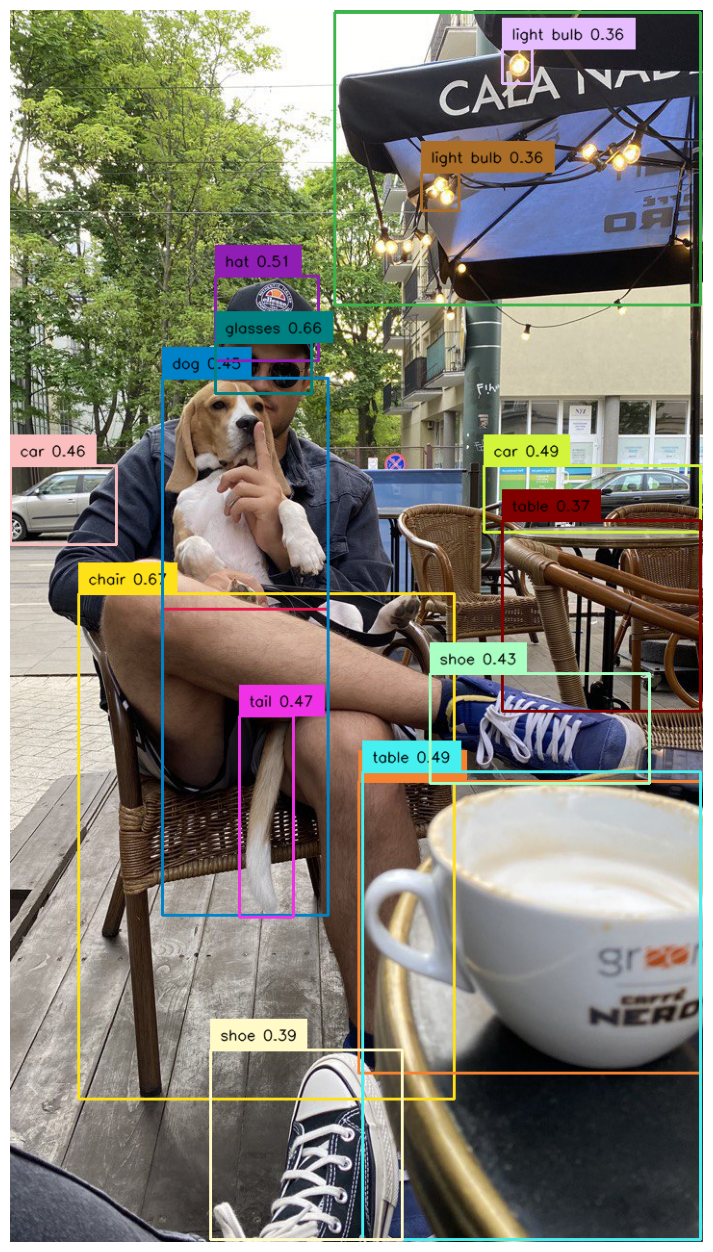

In [44]:
import os
import supervision as sv

IMAGE_NAME = "dog-3.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "chair, dog, table, shoe, light bulb, coffee, hat, glasses, car, tail, umbrella"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
import os
import supervision as sv

IMAGE_NAME = "dog-2.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "glass"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
import os
import supervision as sv

IMAGE_NAME = "dog-2.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "glass most to the right"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
import os
import supervision as sv

IMAGE_NAME = "dog-2.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "straw"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
import os
import supervision as sv

IMAGE_NAME = "dog-4.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "mens shadow"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.plot_image(annotated_frame, (16, 16))

## Grounding DINO with Roboflow Dataset

In [ ]:
%cd {HOME}

In [ ]:
import roboflow

roboflow.login()

In [ ]:
from random import randrange
from roboflow.core.dataset import Dataset


def pick_random_image(dataset: Dataset, subdirrectory: str = "valid") -> str:
    image_directory_path = f"{dataset.location}/{subdirrectory}"
    image_names = os.listdir(image_directory_path)
    image_index = randrange(len(image_names))
    image_name = image_names[image_index]
    image_path = os.path.join(image_directory_path, image_name)
    return image_path

In [ ]:
from roboflow import Roboflow
rf = Roboflow()
project = rf.workspace("work-safe-project").project("safety-vest---v4")
dataset = project.version(3).download("coco")

In [ ]:
TEXT_PROMPT = ", ".join(project.classes.keys())
TEXT_PROMPT

In [ ]:
image_path = pick_random_image(dataset=dataset)

In [ ]:
import os
import supervision as sv

BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(image_path)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.plot_image(annotated_frame, (16, 16))

**NOTE:** The design of the prompt is very important. Try to be as accurate as possible. Avoid abbreviations.

In [ ]:
TEXT_PROMPT = "reflective safety vest, helmet, head, nonreflective safety vest"

In [ ]:
import os
import supervision as sv

BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(image_path)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  
sv.plot_image(annotated_frame, (16, 16))

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.